In [65]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

#What I want to do with this
#create bins of songs based on month released
#sortby those blocks and compare metrics to see if there are any distinctions between the data
#compare each month to the overall year? which stand out
#see if seasons impact which songs are popular

In [21]:
year_data = pd.read_csv('gmResources/data_by_year.csv')
entire_dataset = pd.read_csv('gmResources/data.csv')

In [22]:
year_data.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [23]:


#an example year for testing function
data2020 = entire_dataset.loc[entire_dataset['year'] == 2020]

data2020.sort_values(by =['release_date'], ascending = True).head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
58395,0.00839,['Greg Sletteland'],0.637,185803,0.581,0,0VoyCzfd4M5p23pu5HL1Vy,0.077700,8,0.1140,-10.073,0,Can't Stop This Feeling (Deep House Dance Part...,24,2020-01-01,0.0553,123.912,0.4880,2020
76551,0.26800,['meija'],0.591,187800,0.323,1,6O8AI2tOKLKQ6C3Emm2KAL,0.000000,0,0.2920,-8.758,1,New Years 2020,12,2020-01-01,0.0423,75.000,0.3840,2020
158505,0.55700,['Lil Tjay'],0.886,230448,0.336,1,4Hqh0dS4x07zuRw6eBTO7p,0.000000,4,0.0933,-12.779,1,20/20,71,2020-01-01,0.2390,100.044,0.5360,2020
58397,0.00012,['Greg Sletteland'],0.769,193548,0.818,0,6qRpJ9vJlSppO07xPJPv8k,0.888000,7,0.1530,-9.660,1,Light It Up (Chill Electronic Music Remix),24,2020-01-01,0.0526,124.006,0.4900,2020
56387,0.77600,['Keith Cook'],0.473,370244,0.360,0,70Ts1uhxsqYRo1POyl5Ziy,0.000008,4,0.2150,-10.207,0,For Years - Remastered,0,2020-01-01,0.0311,81.793,0.0392,2020


In [24]:
data2020["release_date"] = pd.to_datetime(data2020["release_date"])

<ipython-input-24-aa6a29045e82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2020["release_date"] = pd.to_datetime(data2020["release_date"])


In [25]:

data2020.groupby(pd.Grouper(key='release_date',freq='M')).count()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
release_date,,,,,,,,,,,,,,,,,,
2020-01-31,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
2020-02-29,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
2020-03-31,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
2020-04-30,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
2020-05-31,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225
2020-06-30,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424
2020-07-31,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2020-08-31,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
2020-09-30,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281


In [26]:
#Seems to have worked with just one year, so I will be comparing all months for the last 20 years now
#picking all years after 2000 as that napster was founded in 2001 and people were able to have more autonomy over
#there musical choices

nap_era_df = entire_dataset.loc[entire_dataset['year'] > 2000]
dates_not_dt = nap_era_df['release_date']
dates_dt = pd.to_datetime(dates_not_dt, yearfirst=True)
dates_dt = dates_dt.dropna()
dates_dt


9071     2008-02-11
9081     2008-02-11
9085     2008-02-11
9087     2018-05-04
9091     2018-05-04
            ...    
174384   2020-12-25
174385   2021-01-22
174386   2020-12-09
174387   2021-01-07
174388   2020-12-09
Name: release_date, Length: 41205, dtype: datetime64[ns]

In [30]:
#create a new column to group all months together even if they are seperate years
months = []
for x in dates_dt:
    months.append(x.month)
    
nap_era_df['month'] = months
nap_era_grouped = nap_era_df.groupby('month')
nap_era_grouped_means = nap_era_grouped.mean()



<ipython-input-30-da3b2a207764>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nap_era_df['month'] = months


In [31]:
monthday = []

for x in dates_dt:
    monthday.append([x.month, x.day])
                    
nap_era_df['month_day_frac'] = monthday
nap_era_df.head()

<ipython-input-31-38d9a98aa78c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nap_era_df['month_day_frac'] = monthday


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,months,month,month_day_frac
9071,0.394,['Gerry & The Pacemakers'],0.484,160187,0.265,0,6catF1lDhNTjjGa2GxRQNN,0.000000,0,0.149,...,You'll Never Walk Alone - Mono; 2002 Remaster,55,2008-02-11,0.0322,113.564,0.285,2008,2,2,"[2, 11]"
9081,0.255,['Gerry & The Pacemakers'],0.405,141987,0.365,0,4aSw1QJIMwYSoDEgzgdCJL,0.000005,6,0.163,...,Ferry Cross the Mersey - Mono; 2002 Remaster,39,2008-02-11,0.0289,104.536,0.588,2008,2,2,"[2, 11]"
9085,0.406,['Gerry & The Pacemakers'],0.477,157093,0.352,0,0ZMMtH875IR2TfkyC4PolD,0.000000,1,0.122,...,Don't Let the Sun Catch You Crying (Main) - Mono,34,2008-02-11,0.0300,106.773,0.478,2008,2,2,"[2, 11]"
9087,0.887,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.904,...,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018,5,5,"[5, 4]"
9091,0.938,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.683,...,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018,5,5,"[5, 4]"


In [32]:
#create variables 
#month_list = nap_era_grouped['months']
month_list = [1,2,3,4,5,6,7,8,9,10,11,12]
acousticness_bymonth = nap_era_grouped_means['acousticness']
danceability_bymonth = nap_era_grouped_means['danceability']
duration_bymonth = nap_era_grouped_means['duration_ms']
energy_bymonth = nap_era_grouped_means['energy']
instrumentalness_bymonth = nap_era_grouped_means['instrumentalness']
liveness_bymonth = nap_era_grouped_means['liveness']
loudness_bymonth = nap_era_grouped_means['loudness']
popularity_bymonth = nap_era_grouped_means['popularity']
speechiness_bymonth = nap_era_grouped_means['speechiness']
tempo_bymonth = nap_era_grouped_means['tempo']
valence_bymonth = nap_era_grouped_means['valence']

Text(0.5, 1.0, 'Instrumentalness of Songs Based on Release Month')

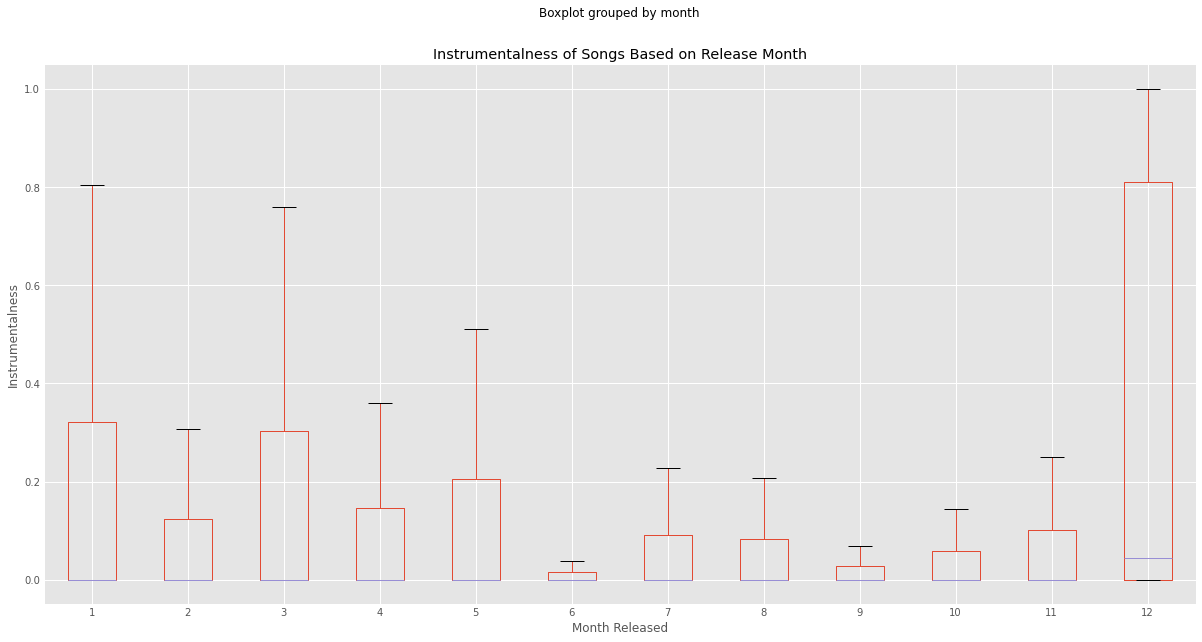

In [53]:
plt.style.use('ggplot')

plot1 = nap_era_df.boxplot("instrumentalness", by='month', figsize=(20, 10), showfliers=False)
plot1.set_xlabel('Month Released')
plot1.set_ylabel('Instrumentalness')
plot1.set_title('Instrumentalness of Songs Based on Release Month')

In [40]:
month1 = nap_era_df[nap_era_df['month'] == 1]['instrumentalness']
month2 = nap_era_df[nap_era_df['month'] == 2]['instrumentalness']
month3 = nap_era_df[nap_era_df['month'] == 3]['instrumentalness']
month4 = nap_era_df[nap_era_df['month'] == 4]['instrumentalness']
month5 = nap_era_df[nap_era_df['month'] == 5]['instrumentalness']
month6 = nap_era_df[nap_era_df['month'] == 6]['instrumentalness']
month7 = nap_era_df[nap_era_df['month'] == 7]['instrumentalness']
month8 = nap_era_df[nap_era_df['month'] == 8]['instrumentalness']
month9 = nap_era_df[nap_era_df['month'] == 9]['instrumentalness']
month10 = nap_era_df[nap_era_df['month'] == 10]['instrumentalness']
month11 = nap_era_df[nap_era_df['month'] == 11]['instrumentalness']
month12 = nap_era_df[nap_era_df['month'] == 12]['instrumentalness']

stats.f_oneway(month1, month2, month3, month4,month5,month6,month7,month8,month9,month10,month11,month12)



months_array = [month1, month2, month3, month4,month5,month6,month7,month8,month9,month10,month11,month12]


Text(0, 0.5, 'Song Popularity')

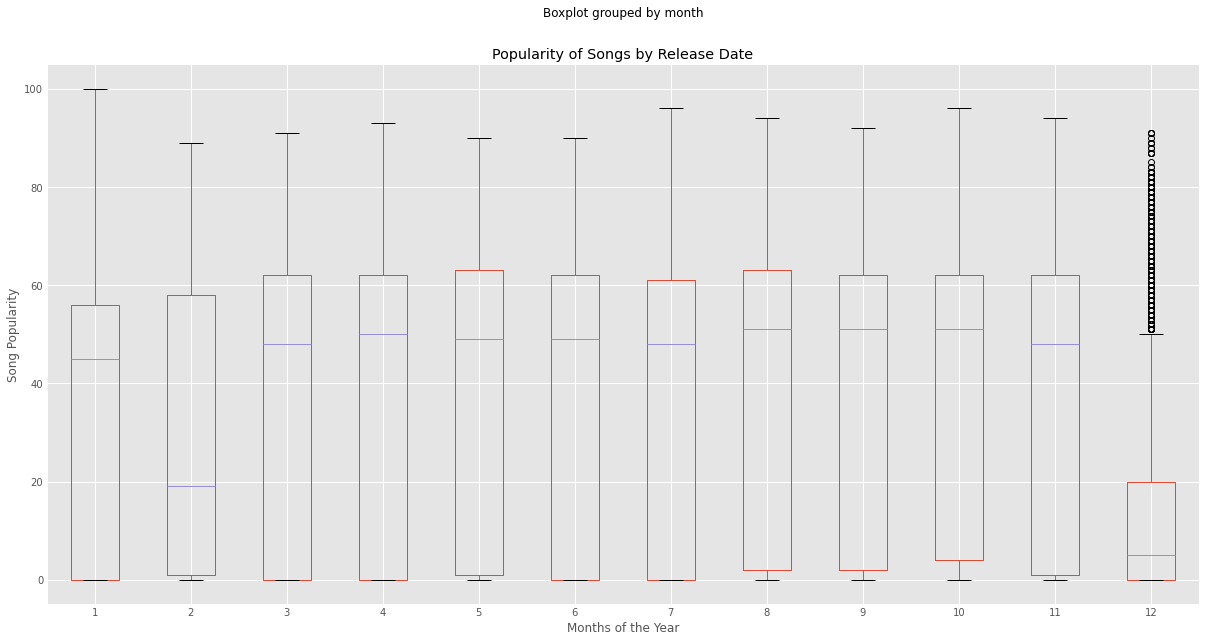

In [54]:


plot3 = nap_era_df.boxplot("popularity", by='month', figsize=(20, 10), showfliers=True)
plot3.set_title('Popularity of Songs by Release Date')
plot3.set_xlabel('Months of the Year')
plot3.set_ylabel('Song Popularity')

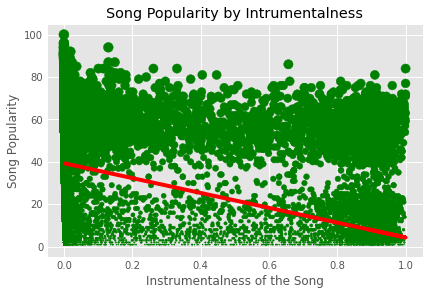

0.17785262525772522

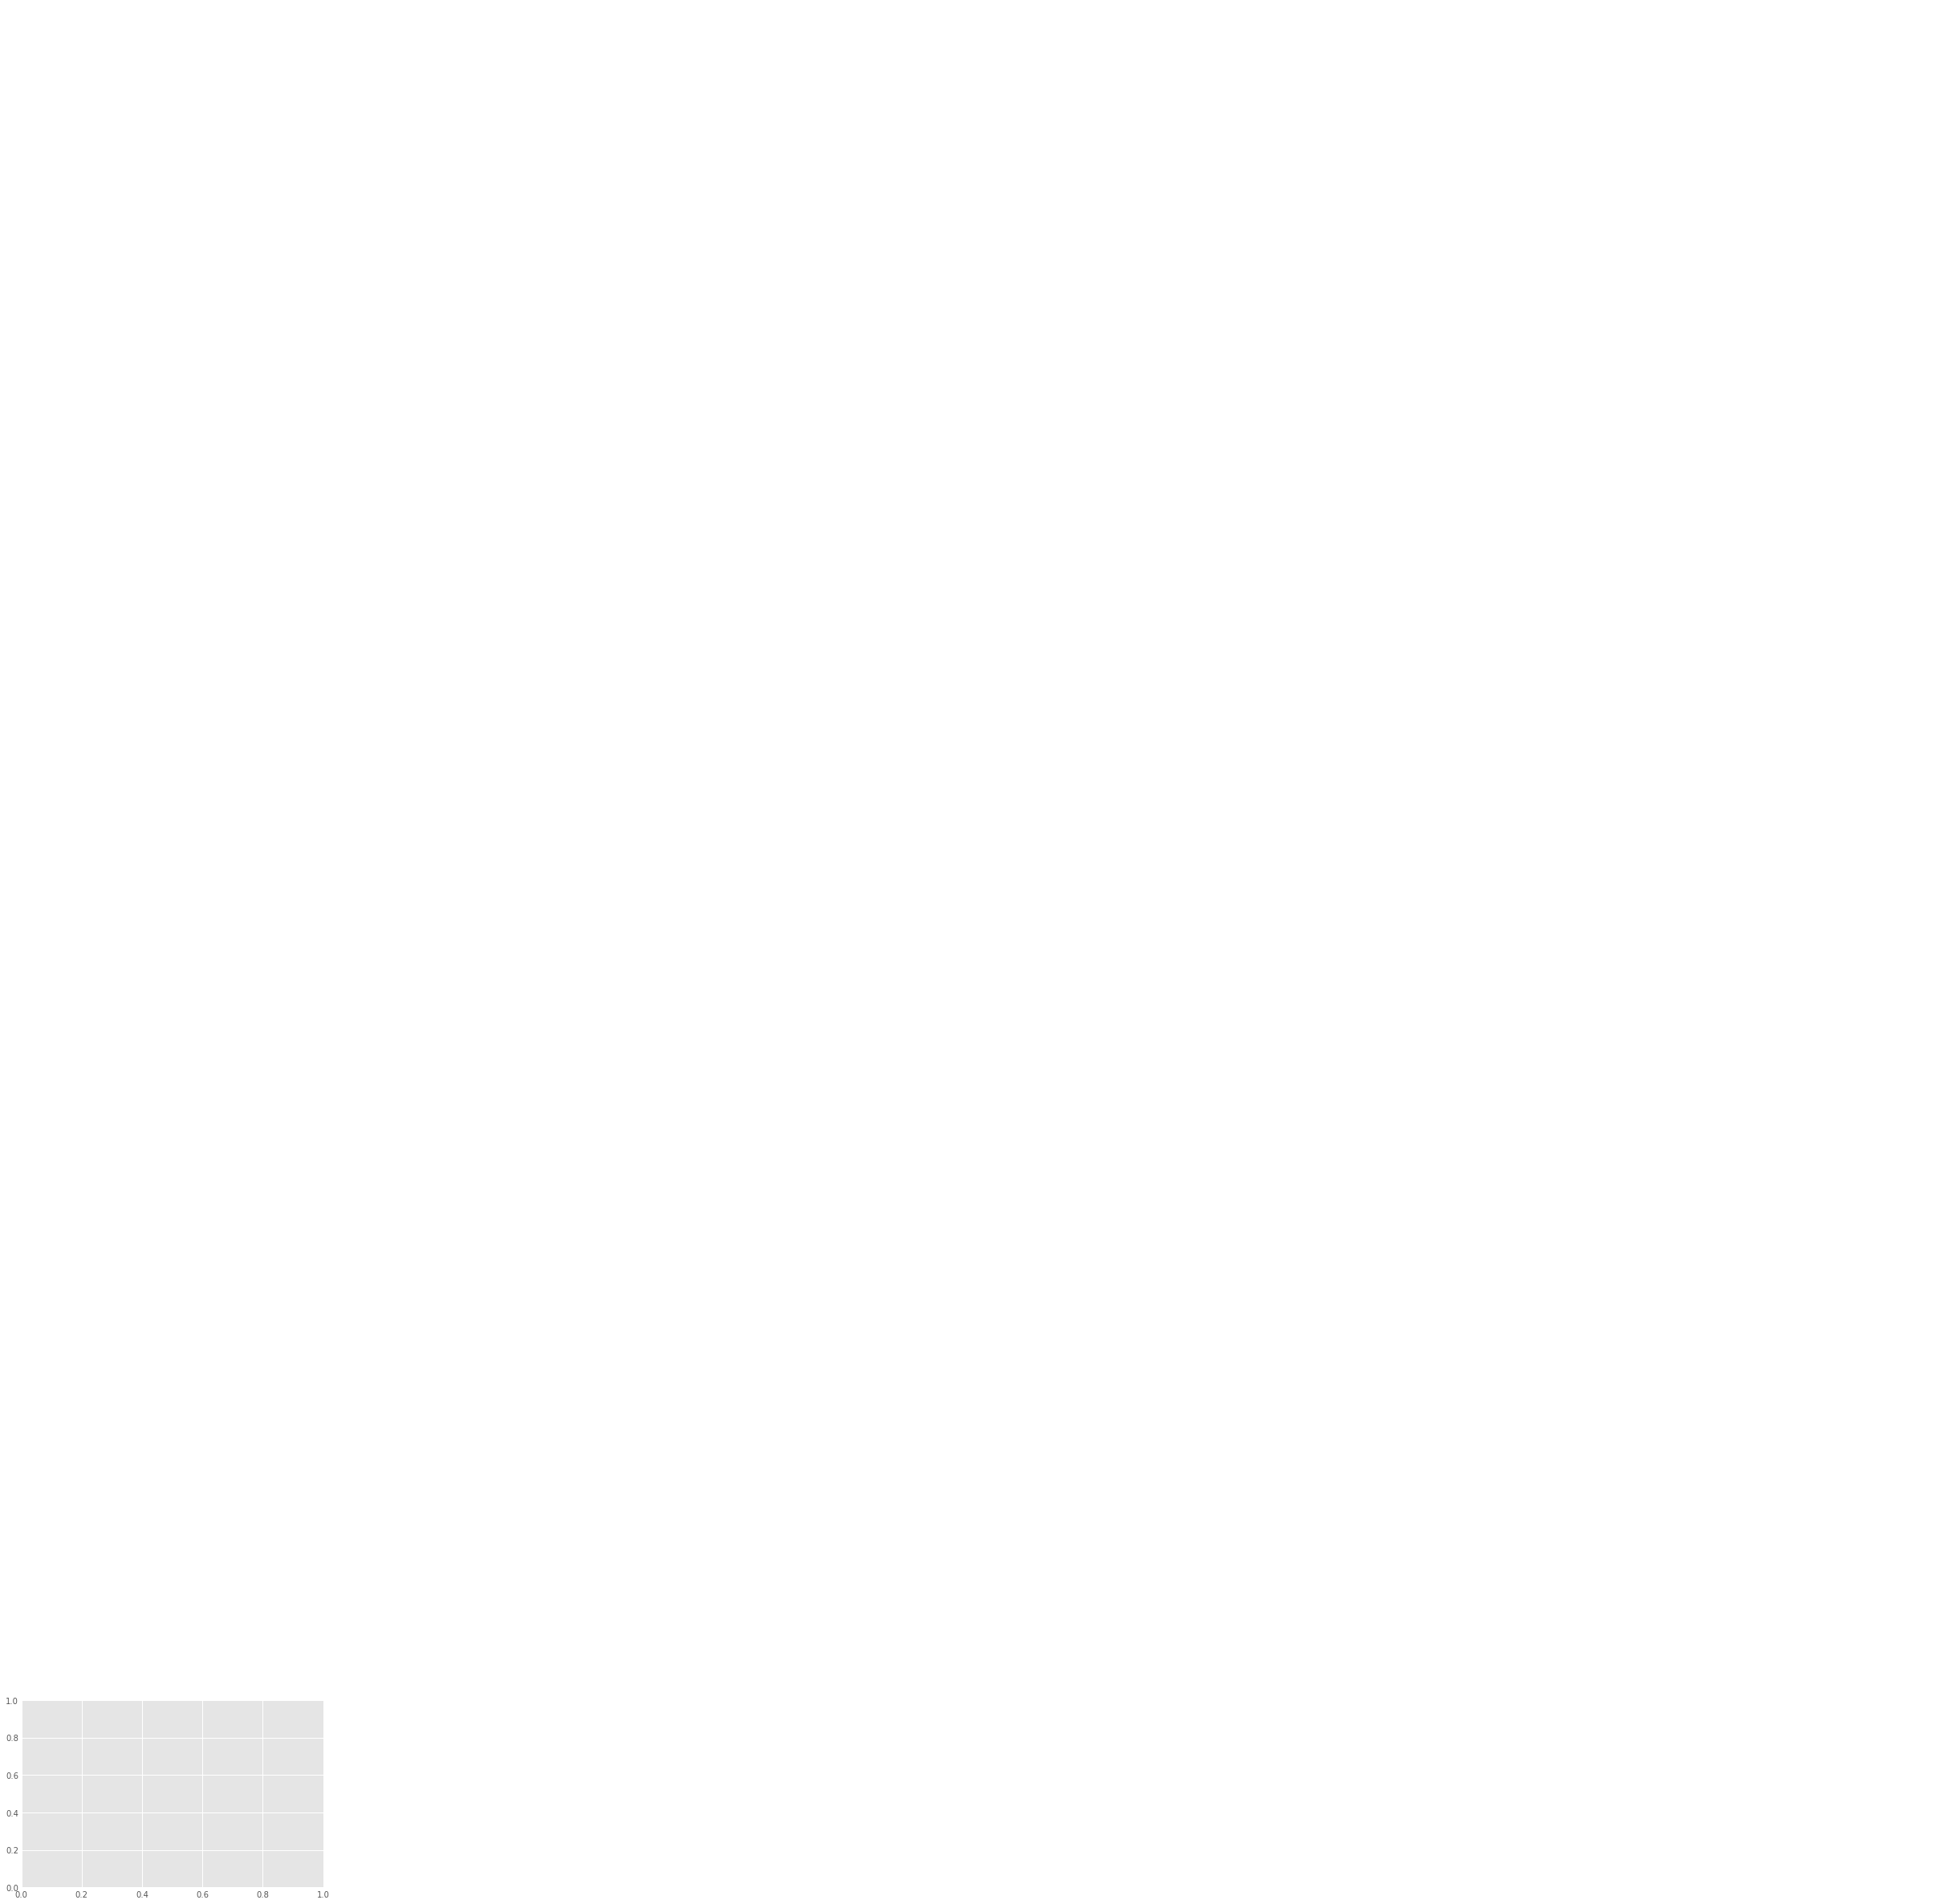

In [81]:
#I want to see if the correlation between song popularity 
#and instrumentalness is negative becasue based on this graph they seem connect
(slope, intercept, rvalue, pvalue, stderr) = linregress(nap_era_df['instrumentalness'],nap_era_df['popularity'])
regress_values = nap_era_df['instrumentalness'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nap_era_df['instrumentalness'],regress_values,"r-")
plt.scatter(nap_era_df['instrumentalness'],nap_era_df['popularity'], s=nap_era_df['popularity'], color='green')
plt.ylabel('Song Popularity')
plt.xlabel('Instrumentalness of the Song')
plt.title('Song Popularity by Intrumentalness')
plt.show()
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
rvalue**2

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nap_era_df['instrumentalness'],nap_era_df['popularity'])
regress_values = nap_era_df['instrumentalness'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nap_era_df['instrumentalness'],regress_values,"r-")
plt.scatter(nap_era_df['instrumentalness'],nap_era_df['popularity'], s=nap_era_df['popularity'], color='green')
plt.ylabel('Song Popularity')
plt.xlabel('Instrumentalness of the Song')
plt.title('Song Popularity by Intrumentalness')
plt.show()
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
rvalue**2